In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Load the modules
sys.path.insert(1, "/home/nexus-admin/NEXUS_RF/BackendTools")
import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

In [3]:
## MB Results come from fitting a temperature scan at a specified RF power
MB_fit_vals = np.array([4.24216+9.75e-6, 
                        0.177  ,
                        0.0125 ,
                        4.1e7  ]) ## [ F0 [GHz] , Delta , alpha , Qi0 ]

## How much attenuation is in the lines before the chip
line_atten_dB = 56.5

In [ ]:
## 3/4 Al Runs
series_list = np.array([
    "20240304_165602", 
    "20240304_165804", 
    "20240304_165959", 
    "20240304_170154", 
    "20240304_170349", 
    "20240304_170544", 
    "20240304_170739", 
    "20240304_170935", 
    "20240304_171130", 
    "20240304_171325", 
    "20240304_171520", 
    "20240304_171716", 
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_min, stop=P_max+P_step, step=P_step)

In [4]:
## 2/12 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20230212_222746", 
    "20230212_222921", 
    "20230212_223049", 
    "20230212_223217", 
    "20230212_223346", 
    "20230212_223515", 
    "20230212_223644", 
    "20230212_223813", 
    "20230212_223942", 
    "20230212_224111", 
    "20230212_224240", 
    "20230212_224409", 
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_min, stop=P_max+P_step, step=P_step)

for i in np.arange(len(series_list)):
    print(series_list[i], ":" , powers_list[i])


20230212_222746 : -70
20230212_222921 : -65
20230212_223049 : -60
20230212_223217 : -55
20230212_223346 : -50
20230212_223515 : -45
20230212_223644 : -40
20230212_223813 : -35
20230212_223942 : -30
20230212_224111 : -25
20230212_224240 : -20
20230212_224409 : -15


In [ ]:
## 6/07 Al Runs
series_list = np.array([
#     "20220607_095300" , 
    "20220607_100452" , 
    "20220607_100858" , 
    "20220607_101139" , 
    "20220607_102016" , 
    "20220607_102257" , 
    "20220607_102619" , 
    "20220607_103040" , 
    "20220607_103312" , 
    "20220607_103536" , 
    "20220607_103820" , 
    "20220607_104103" , 
    "20220607_104418" , 
    "20220607_104739" , 
#     "20220607_105011" 
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_min, stop=P_max+P_step, step=P_step)[1:-1]

In [ ]:
## 6/19 Al Runs
series_list = np.array([
    "20220619_155709",
    "20220619_153053",
    "20220619_152817",
    "20220619_152542",
    "20220619_152210",
    "20220619_151914",
#     "20220619_151634",
#     "20220619_151405",
#     "20220619_150933",
#     "20220619_150645",
#     "20220619_150415",
#     "20220619_150117",
#     "20220619_145802",
#     "20220619_145536",
#     "20220619_145204"
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[:6]#[3:-1]

In [ ]:
## 6/19 Nb7 Runs
series_list = np.array([
#     "20220619_171322",
#     "20220619_171119",
#     "20220619_170714",
    "20220619_170214",
    "20220619_170017",
    "20220619_165127",
    "20220619_164921",
    "20220619_164721",
    "20220619_164257",
    "20220619_164056",
    "20220619_162829",
    "20220619_162632",
    "20220619_161836",
    "20220619_161640",
    "20220619_160446"
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[3:]

In [ ]:
## 6/30 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20220630_090941",
    "20220630_090827",
    "20220630_090713",
    "20220630_090559",
    "20220630_090445",
    "20220630_090331",
    "20220630_090217",
    "20220630_090103",
    "20220630_085949",
    "20220630_085835",
    "20220630_085721",
    "20220630_085600"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 6/30 Al Runs - Shield Closed, No Laser, people in clean room
series_list = np.array([
    "20220630_120041",
    "20220630_115927",
    "20220630_115813",
    "20220630_115659",
    "20220630_115545",
    "20220630_115431",
    "20220630_115317",
    "20220630_115203",
    "20220630_115049",
    "20220630_114935",
    "20220630_114821",
    "20220630_114700"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 6/30 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20220630_155428",
    "20220630_155320",
    "20220630_155212",
    "20220630_155104",
    "20220630_154956",
    "20220630_154848",
    "20220630_154740",
    "20220630_154632",
    "20220630_154524",
    "20220630_154416",
    "20220630_154308",
    "20220630_154154"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 7/6 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20220706_164154",
    "20220706_164040",
    "20220706_163926",
    "20220706_163812",
    "20220706_163658",
    "20220706_163544",
    "20220706_163430",
    "20220706_163316",
    "20220706_163202",
    "20220706_163048",
    "20220706_162934",
    "20220706_162814"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 10/19 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20221019_121526",
    "20221019_121708",
    "20221019_121843",
    "20221019_122019",
    "20221019_122154",
    "20221019_122329",
    "20221019_122504",
    "20221019_122639",
    "20221019_122815",
    "20221019_122951"
])

P_min = -60 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[::-1]

In [ ]:
## 10/28 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20221028_150303",
    "20221028_150154",
    "20221028_150045",
    "20221028_145936",
    "20221028_145827",
    "20221028_145718",
    "20221028_145609",
    "20221028_145500",
    "20221028_145352",
    "20221028_145244",
    "20221028_145136",
    "20221028_145021"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 2/22 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20230222_083158",
    "20230222_083028",
    "20230222_082858",
    "20230222_082729",
    "20230222_082558",
    "20230222_082428",
    "20230222_082258",
    "20230222_082128",
    "20230222_081959",
    "20230222_081831",
    "20230222_081700",
    "20230222_081524"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 4/10 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20230410_120536",
    "20230410_120407",
    "20230410_120238",
    "20230410_120110",
    "20230410_115942",
    "20230410_115814",
    "20230410_115640"
])

P_min = -60 ; P_max = -30 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 7/6 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20230706_202033",
    "20230706_201904",
    "20230706_201735",
    "20230706_201606",
    "20230706_201437",
    "20230706_201308",
    "20230706_201139",
    "20230706_201010",
    "20230706_200841",
    "20230706_200713",
    "20230706_200545",
    "20230706_200409"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 7/13 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20230713_143502",
    "20230713_143636",
    "20230713_143804",
    "20230713_143932",
    "20230713_144101",
    "20230713_144230",
    "20230713_144359",
    "20230713_144528",
    "20230713_144657",
    "20230713_144826",
    "20230713_144955",
    "20230713_145124"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[::-1]

In [7]:
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_list[i], "dBm")

20230212_222746 : -70 dBm
20230212_222921 : -65 dBm
20230212_223049 : -60 dBm
20230212_223217 : -55 dBm
20230212_223346 : -50 dBm
20230212_223515 : -45 dBm
20230212_223644 : -40 dBm
20230212_223813 : -35 dBm
20230212_223942 : -30 dBm
20230212_224111 : -25 dBm
20230212_224240 : -20 dBm
20230212_224409 : -15 dBm


In [8]:
powers_on_device = powers_list - line_atten_dB
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_on_device[i], "dBm")

20230212_222746 : -126.5 dBm
20230212_222921 : -121.5 dBm
20230212_223049 : -116.5 dBm
20230212_223217 : -111.5 dBm
20230212_223346 : -106.5 dBm
20230212_223515 : -101.5 dBm
20230212_223644 : -96.5 dBm
20230212_223813 : -91.5 dBm
20230212_223942 : -86.5 dBm
20230212_224111 : -81.5 dBm
20230212_224240 : -76.5 dBm
20230212_224409 : -71.5 dBm


In [ ]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series_list[3], verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
print(avg_frqs, avg_S21s)

In [ ]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075,
                                               charFs = avg_frqs,
                                               charZs = avg_S21s,
                                               MBresults = MB_fit_vals)

In [ ]:
PSDs.keys()

In [ ]:
plt.loglog(PSDs['f'],PSDs['kappa_1'])

In [ ]:
del powers, PSDs, res, timestreams

## Now package it all together

In [9]:
%matplotlib notebook
# plt.rcParams.update({'font.size': 16})

<IPython.core.display.Javascript object>


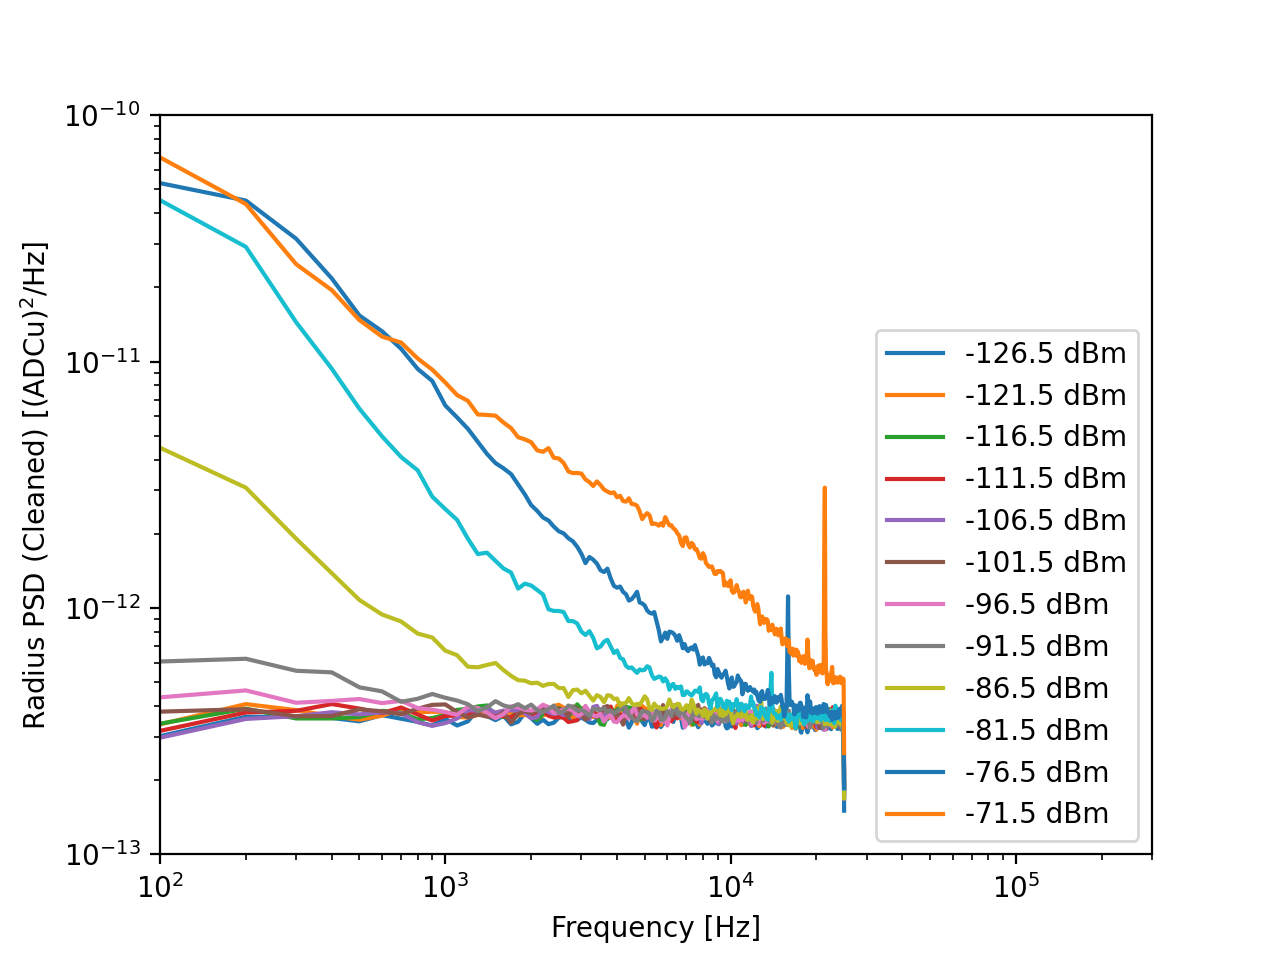

<IPython.core.display.Javascript object>


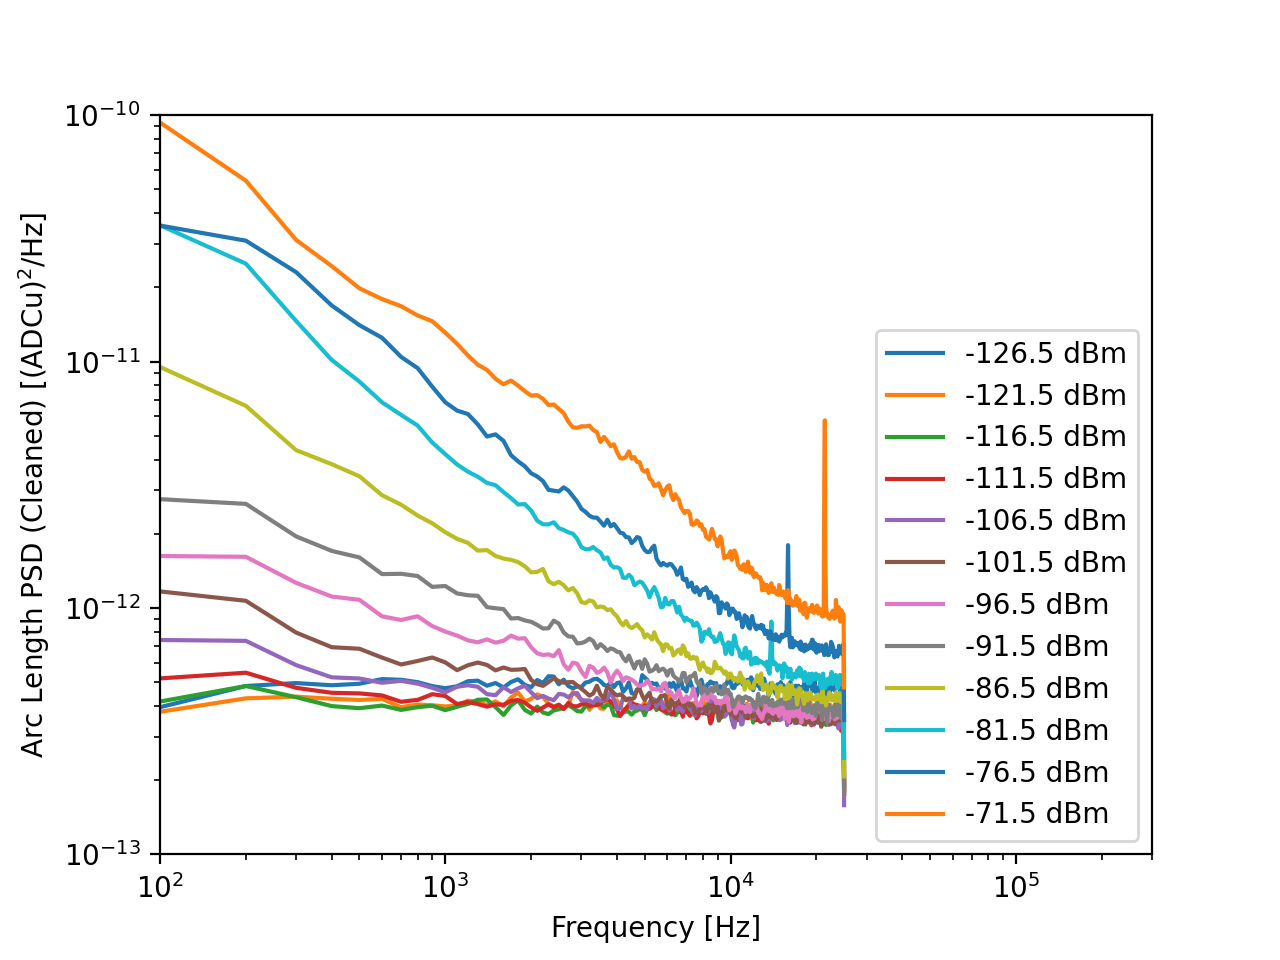

<IPython.core.display.Javascript object>


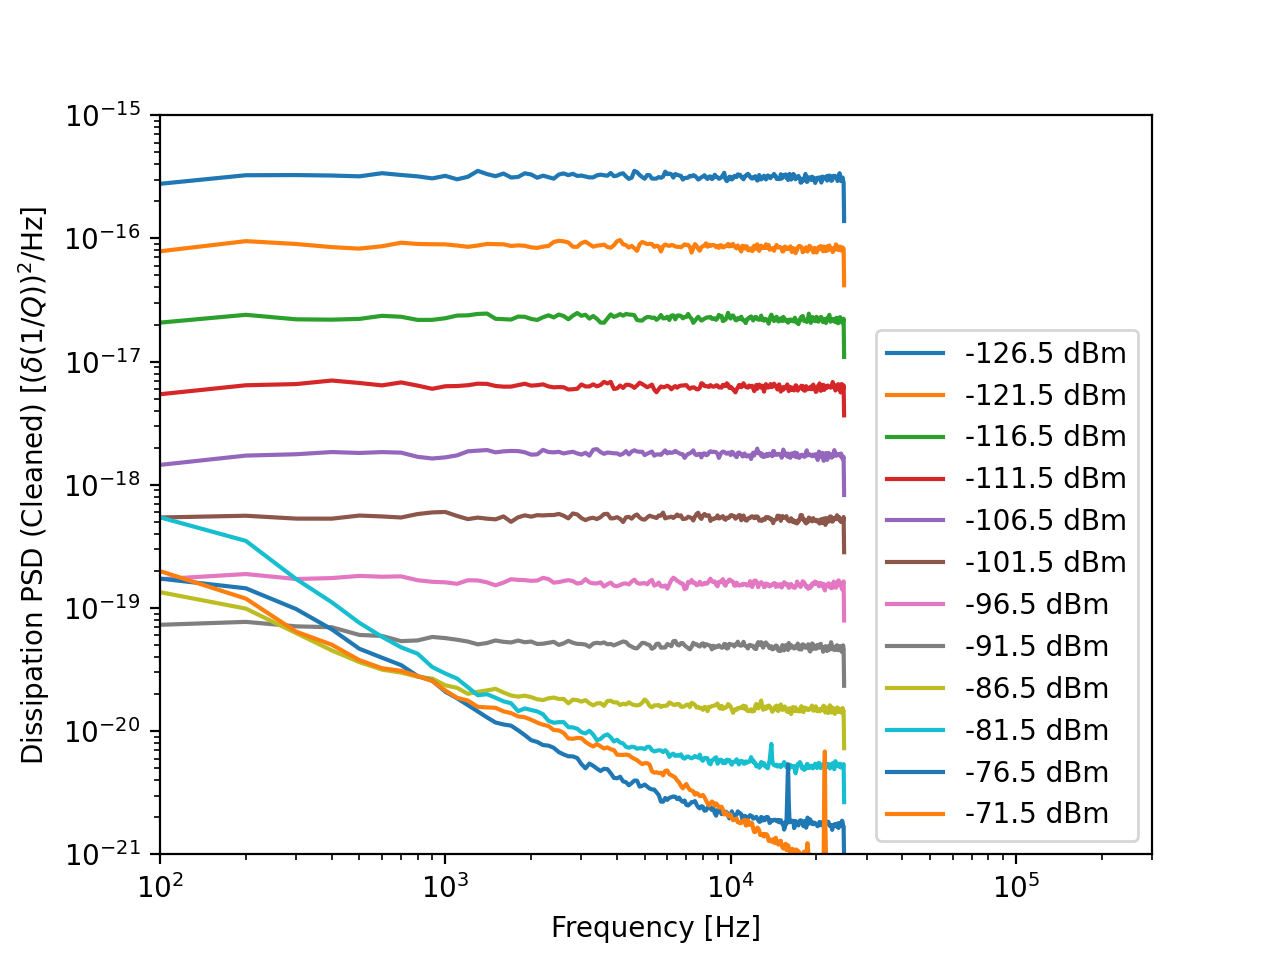

<IPython.core.display.Javascript object>


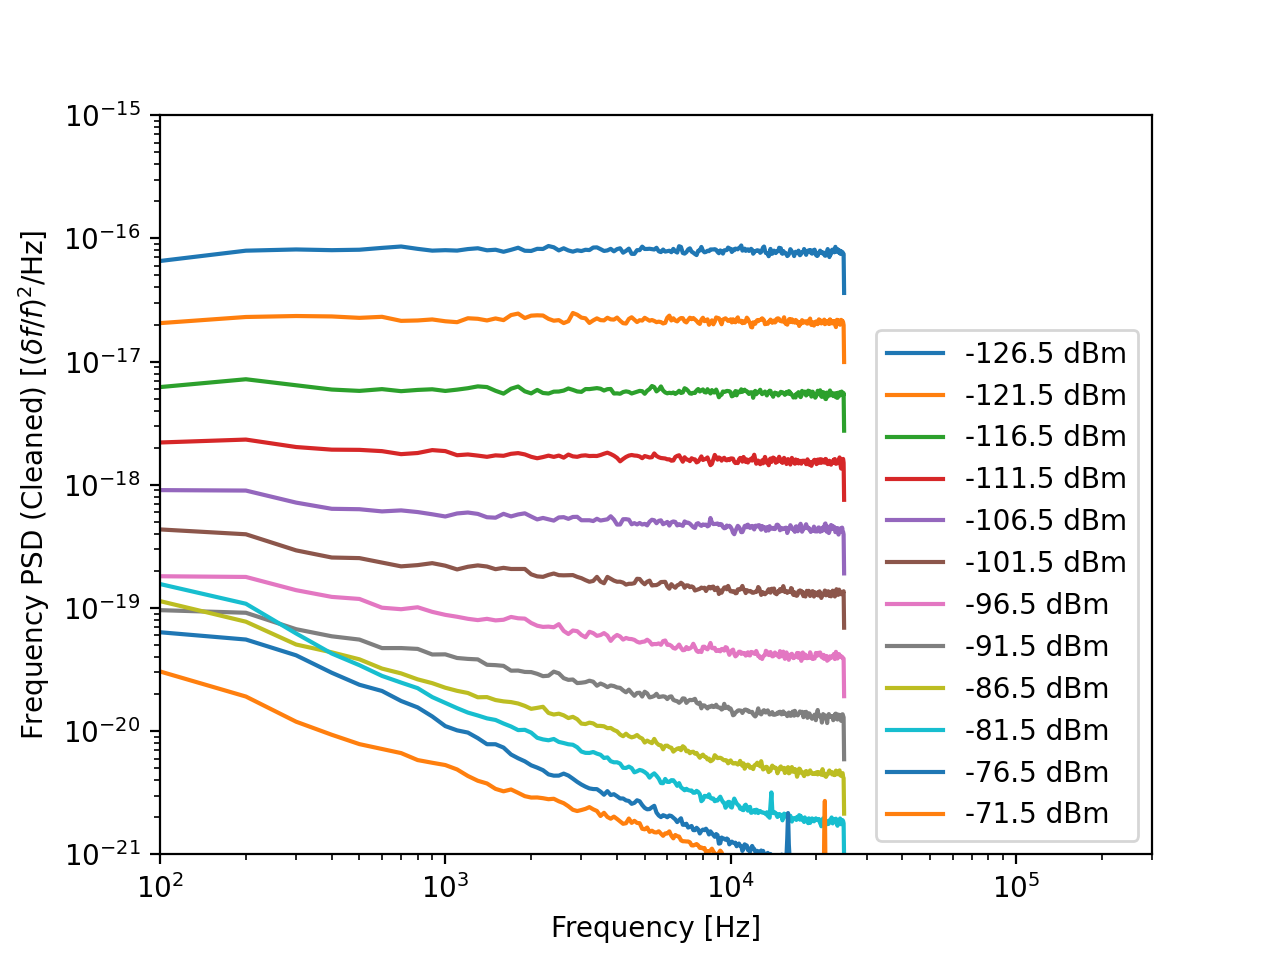

<IPython.core.display.Javascript object>


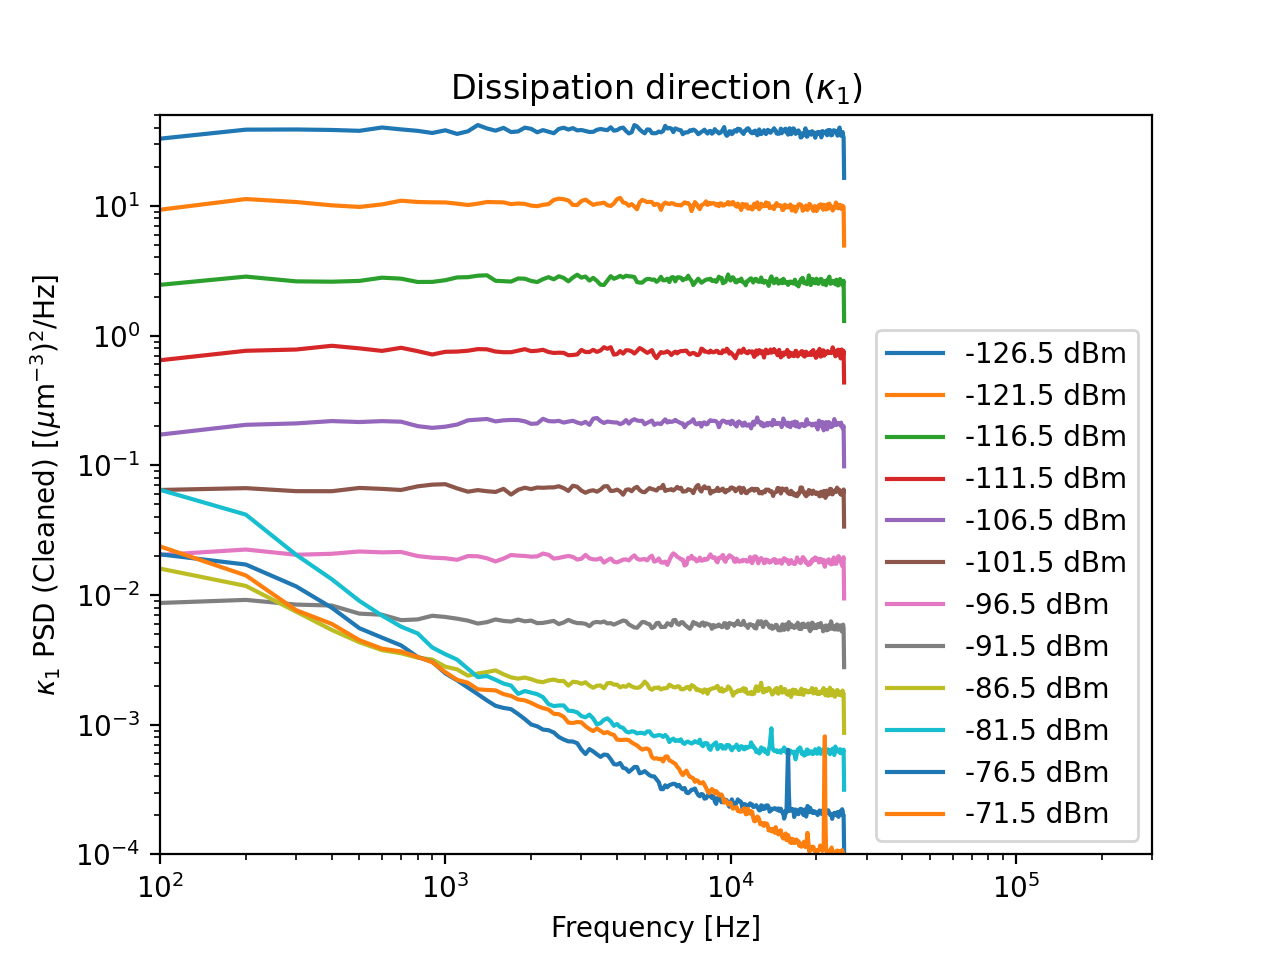

<IPython.core.display.Javascript object>


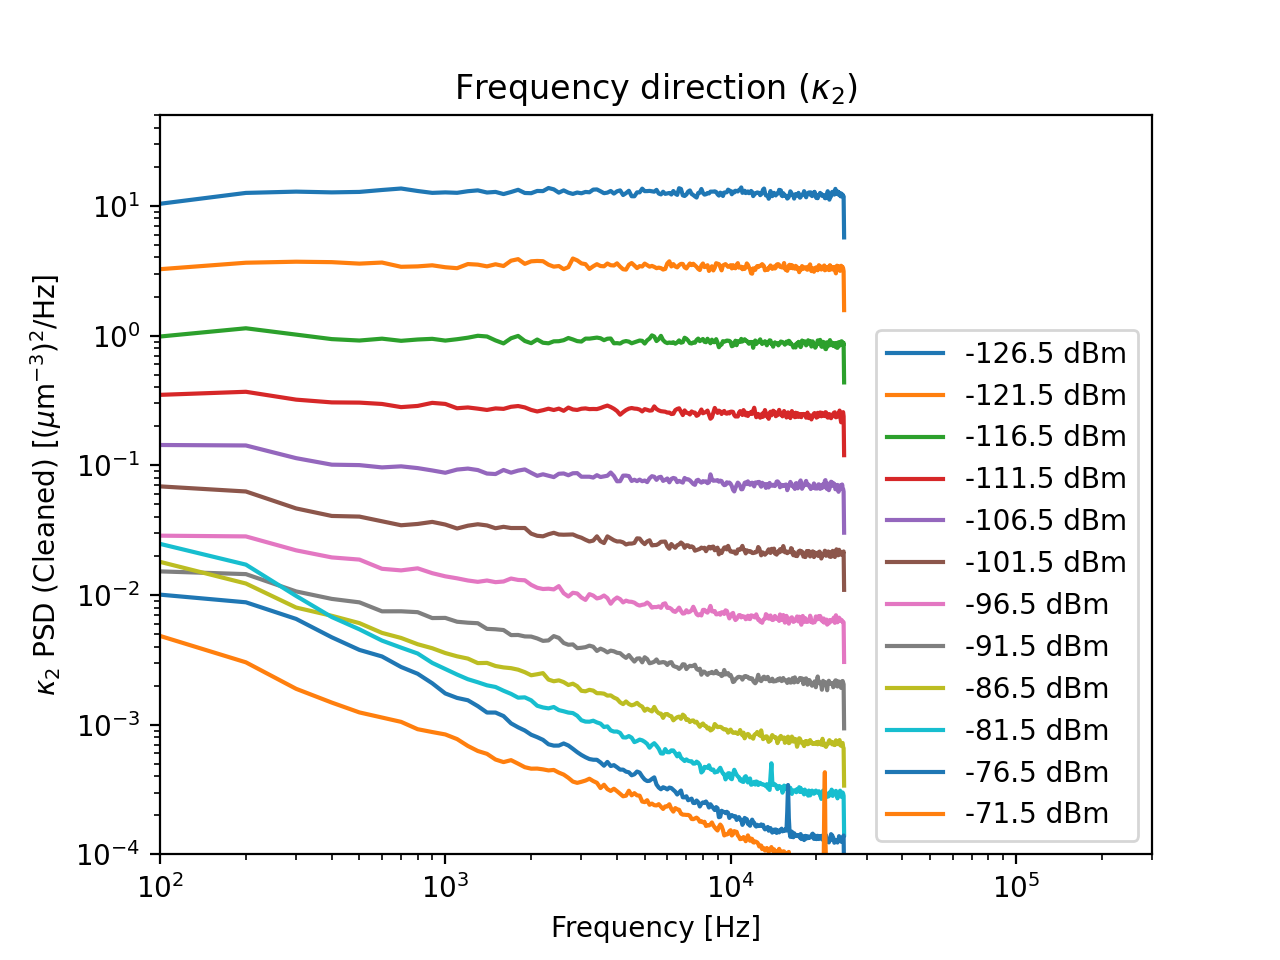

pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230212/20230212_222746/USRP_Noise_20230212_222746_delta0.h5 because override=True!
found 14 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230212/20230212_222746/USRP_Noise_20230212_222746_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230212/20230212_222921/USRP_Noise_20230212_222921_delta0.h5 because override=True!
found 3 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230212/20230212_222921/USRP_Noise_20230212_222921_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!
pulse time data already exists! If you set override=False

In [10]:
PSD_lo_Hz = 1e2
PSD_hi_Hz = 5e4

Thf.PlotPSDsByPower(series_list, powers_on_device, 
    PSD_lo_f=PSD_lo_Hz, PSD_hi_f=5e4, fHz_range = [PSD_lo_Hz,3e5], 
    e_b_PSDrange = [1e-13,1e-10], r_b_PSDrange = [1e-21,1e-15], 
    q_b_PSDrange = [1e-4,5e1], MB_fit_result=MB_fit_vals)